UNIVERSIDAD INTERNACIONAL DEL ECUADOR
NOMBRE: DANNY ISRAEL AVALOS SAMUEZA
MATERIA: TRATAMIENTO DE DATOS
EXAMEN FINAL

EL SIGUIENTE EJERCIO NOS AYUDA A PREDECIR EL USO DE INTERNET BASANDONOS EN LA EDAD, ESTUDIOS Y SEXO
Lo actividades que realizaremos serán las siguientes:
* Carga de archivos por medio de la librería Pandas
* Seleccionaremos variables
* Limpieza de datos
* Cambio de nombre en columnas y almacenamiento en otro dataframe
* Entrenamiento de modelo con el arbol tree.DecisionTreeClassifier()
* visualización de árbol
* calculo de la predicción
* calculo de la media
* calculo de que tan eficiente es el modelo
* gráfico o interpretación del modelo


In [1]:
import pandas as pd
import numpy as np


In [2]:
df_internet = pd.read_csv("C:\\Users\\davalos\\Dropbox\\Davalos\\Documents\\Danny Documentos\\UIDE\Materias\\Cloud Computing\\Semana 3\\Prueba final\\DataExamenFinal.csv")
#veamos que tiene el dataset
df_internet.sample(10)


,N,uso_internet,sexo,edad,estudios
189,191,0,Mujer,55,Secundaria
1085,1094,0,Mujer,45,Primaria
1053,1062,0,Hombre,31,Primaria
1116,1125,0,Mujer,24,Primaria
591,597,0,Hombre,48,Primaria
1086,1095,0,Mujer,54,Universitarios
370,373,0,Hombre,59,Sin estudios
81,83,0,Hombre,41,Profesionales
921,929,0,Mujer,50,Primaria
834,842,1,Mujer,24,Profesionales


La columna `uso_internet` contiene información sobre si un usuario tienen interner o no tiene internet:

🚴‍♂️ '0' No tiene internet <br>
🚴‍♂️ '1' si tiene internet <br>

In [3]:
#utilizamos describe para ver el resumen estadistico de los datos de la columna uso_internet
df_internet['uso_internet'].describe()

count    1999.000000
mean        0.538769
std         0.498619
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: uso_internet, dtype: float64

In [4]:
df_internet['sexo'] = df_internet['sexo'].str.lower()
df_internet['estudios'] = df_internet['estudios'].str.lower()
df_internet.sample(10)

,N,uso_internet,sexo,edad,estudios
748,755,0,hombre,39,primaria
220,222,1,hombre,44,universitarios
783,791,1,mujer,21,profesionales
1614,1630,1,hombre,34,secundaria
1876,1893,0,mujer,56,primaria
472,475,0,mujer,63,primaria
13,14,0,mujer,48,primaria
1823,1840,0,mujer,59,primaria
682,688,1,hombre,21,primaria
17,18,1,hombre,34,profesionales


In [5]:
df_internet['sexo'] = df_internet['sexo'].str.strip()
df_internet['estudios'] = df_internet['estudios'].str.strip()
df_internet.sample(10)

,N,uso_internet,sexo,edad,estudios
1195,1204,1,mujer,34,universitarios
257,260,1,hombre,32,universitarios
602,608,1,hombre,22,profesionales
1088,1097,0,mujer,79,primaria
453,456,0,mujer,34,primaria
1509,1524,1,hombre,30,secundaria
1170,1179,0,mujer,63,primaria
838,846,1,mujer,36,universitarios
676,682,0,hombre,52,primaria
1811,1828,0,mujer,66,primaria


In [6]:
# Creamos los rangos para categoria
label_ranges = [0, 12, 18,50, np.inf]
label_names = ['Nino', 'adolecente', 'adulto','adulto mayor']

# Creamos la columna wait_type  
df_internet['etapas'] = pd.cut(df_internet['edad'], bins =label_ranges, 
                                labels = label_names)

df_internet.sample(10)

,N,uso_internet,sexo,edad,estudios,etapas
362,365,1,hombre,32,universitarios,adulto
87,89,1,mujer,47,universitarios,adulto
860,868,1,mujer,46,primaria,adulto
340,343,1,hombre,32,profesionales,adulto
194,196,1,hombre,19,primaria,adulto
250,253,1,hombre,28,profesionales,adulto
393,396,0,mujer,81,profesionales,adulto mayor
524,528,1,hombre,40,universitarios,adulto
432,435,0,mujer,63,sin estudios,adulto mayor
235,237,0,mujer,19,primaria,adulto


In [7]:
df_internet =pd.get_dummies(df_internet,columns=['sexo'], drop_first=True)
df_internet =pd.get_dummies(df_internet,columns=['estudios'], drop_first=True)
df_internet =pd.get_dummies(df_internet,columns=['etapas'], drop_first=True)

In [8]:
df_internet.sample(10)

,N,uso_internet,edad,sexo_mujer,estudios_profesionales,estudios_secundaria,estudios_sin estudios,estudios_universitarios,etapas_adolecente,etapas_adulto,etapas_adulto mayor
1094,1103,0,30,1,0,0,0,0,0,1,0
1089,1098,1,40,0,1,0,0,0,0,1,0
1625,1641,1,60,0,0,1,0,0,0,0,1
1658,1674,0,78,1,0,0,0,0,0,0,1
1742,1759,0,21,0,0,0,0,0,0,1,0
866,874,0,67,0,1,0,0,0,0,0,1
1647,1663,0,46,0,0,0,0,0,0,1,0
1519,1534,0,55,1,0,0,0,0,0,0,1
1440,1454,1,22,0,1,0,0,0,0,1,0
1483,1498,1,64,0,0,0,0,0,0,0,1


In [9]:
df_internet2= df_internet.rename(columns={'uso_internet':'internet','sexo_mujer':'sexo','estudios_profesionales':'profesionales','estudios_secundaria':'secundaria','estudios_sin estudios':'sin estudios','etapas_adolecente':'adolecente','etapas_adulto':'adulto','etapas_adulto mayor':'adulto mayor'})


In [10]:
df_internet2.sample(10)

,N,internet,edad,sexo,profesionales,secundaria,sin estudios,estudios_universitarios,adolecente,adulto,adulto mayor
1404,1418,0,74,0,0,0,0,0,0,0,1
1845,1862,1,45,1,0,0,0,0,0,1,0
318,321,0,64,1,0,0,0,0,0,0,1
1885,1902,1,33,0,1,0,0,0,0,1,0
258,261,0,60,0,0,0,0,0,0,0,1
574,579,0,31,1,1,0,0,0,0,1,0
393,396,0,81,1,1,0,0,0,0,0,1
972,981,1,34,0,1,0,0,0,0,1,0
257,260,1,32,0,0,0,0,1,0,1,0
64,66,0,44,1,0,0,0,0,0,1,0


In [11]:
from sklearn import tree

In [12]:

clf = tree.DecisionTreeClassifier(max_depth=3)

In [13]:

X = df_internet2.drop(columns='internet')

In [14]:
y = df_internet2.internet

In [15]:
X_train, Y_train =(X, y)

In [16]:
X_train

,N,edad,sexo,profesionales,secundaria,sin estudios,estudios_universitarios,adolecente,adulto,adulto mayor
0,1,66,1,0,0,0,0,0,0,1
1,2,72,0,0,0,0,0,0,0,1
2,3,48,0,0,0,0,1,0,1,0
3,4,59,0,0,0,0,1,0,0,1
4,5,44,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1994,2012,24,0,0,0,0,1,0,1,0
1995,2013,50,1,0,0,0,1,0,1,0
1996,2014,64,0,0,0,0,1,0,0,1
1997,2015,31,1,1,0,0,0,0,1,0


In [17]:
Y_train

0       0
1       1
2       1
3       0
4       1
       ..
1994    1
1995    1
1996    1
1997    1
1998    1
Name: internet, Length: 1999, dtype: int64

In [18]:
clf = clf.fit(X_train.values, Y_train)

In [19]:
clf

DecisionTreeClassifier(max_depth=3)

In [20]:
from sklearn import tree

[Text(0.5, 0.875, 'X[1] <= 48.5\ngini = 0.497\nsamples = 1999\nvalue = [922, 1077]'),
 Text(0.25, 0.625, 'X[6] <= 0.5\ngini = 0.342\nsamples = 1153\nvalue = [252, 901]'),
 Text(0.125, 0.375, 'X[1] <= 36.5\ngini = 0.408\nsamples = 868\nvalue = [248, 620]'),
 Text(0.0625, 0.125, 'gini = 0.312\nsamples = 516\nvalue = [100, 416]'),
 Text(0.1875, 0.125, 'gini = 0.487\nsamples = 352\nvalue = [148, 204]'),
 Text(0.375, 0.375, 'X[1] <= 47.5\ngini = 0.028\nsamples = 285\nvalue = [4, 281]'),
 Text(0.3125, 0.125, 'gini = 0.021\nsamples = 283\nvalue = [3, 280]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.625, 'X[6] <= 0.5\ngini = 0.33\nsamples = 846\nvalue = [670, 176]'),
 Text(0.625, 0.375, 'X[4] <= 0.5\ngini = 0.259\nsamples = 754\nvalue = [639, 115]'),
 Text(0.5625, 0.125, 'gini = 0.193\nsamples = 684\nvalue = [610, 74]'),
 Text(0.6875, 0.125, 'gini = 0.485\nsamples = 70\nvalue = [29, 41]'),
 Text(0.875, 0.375, 'X[1] <= 63.5\ngini = 0.447\nsamples = 92\nvalu

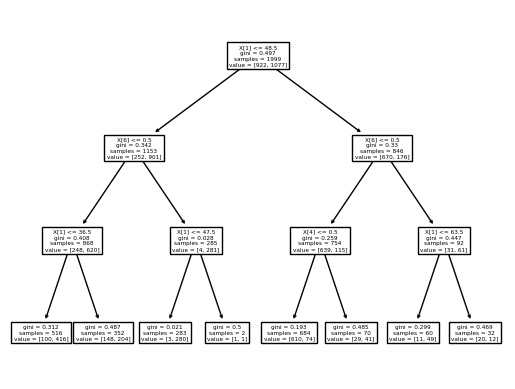

In [21]:
tree.plot_tree(clf)

In [22]:
X_train.sample()

,N,edad,sexo,profesionales,secundaria,sin estudios,estudios_universitarios,adolecente,adulto,adulto mayor
1508,1523,54,1,1,0,0,0,0,0,1


In [23]:
pred=clf.predict(X_train.values)

In [24]:
np.array([X.iloc[0]])

array([[ 1, 66,  1,  0,  0,  0,  0,  0,  0,  1]], dtype=int64)

In [25]:
clf.predict(np.array([X.iloc[0]]))

array([0], dtype=int64)

In [26]:
import seaborn as sba

In [27]:
X_train

,N,edad,sexo,profesionales,secundaria,sin estudios,estudios_universitarios,adolecente,adulto,adulto mayor
0,1,66,1,0,0,0,0,0,0,1
1,2,72,0,0,0,0,0,0,0,1
2,3,48,0,0,0,0,1,0,1,0
3,4,59,0,0,0,0,1,0,0,1
4,5,44,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1994,2012,24,0,0,0,0,1,0,1,0
1995,2013,50,1,0,0,0,1,0,1,0
1996,2014,64,0,0,0,0,1,0,0,1
1997,2015,31,1,1,0,0,0,0,1,0


In [28]:
Y_train

0       0
1       1
2       1
3       0
4       1
       ..
1994    1
1995    1
1996    1
1997    1
1998    1
Name: internet, Length: 1999, dtype: int64

In [29]:
pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [30]:
df_internet2['prediccion'] = pred

In [31]:
df_internet2.sample(20)[['internet','prediccion']]

,internet,prediccion
1398,0,1
1226,1,1
1193,1,1
1968,1,1
1402,1,1
1958,1,1
1604,0,0
10,0,0
1875,1,1
1401,1,1


In [32]:
df_internet2

,N,internet,edad,sexo,profesionales,secundaria,sin estudios,estudios_universitarios,adolecente,adulto,adulto mayor,prediccion
0,1,0,66,1,0,0,0,0,0,0,1,0
1,2,1,72,0,0,0,0,0,0,0,1,0
2,3,1,48,0,0,0,0,1,0,1,0,0
3,4,0,59,0,0,0,0,1,0,0,1,1
4,5,1,44,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2012,1,24,0,0,0,0,1,0,1,0,1
1995,2013,1,50,1,0,0,0,1,0,1,0,1
1996,2014,1,64,0,0,0,0,1,0,0,1,0
1997,2015,1,31,1,1,0,0,0,0,1,0,1


In [33]:
(df_internet2['internet']==df_internet2['prediccion']).mean()

0.8109054527263632

<BarContainer object of 1999 artists>

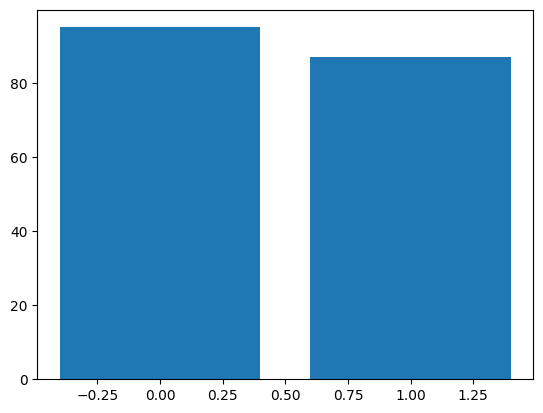

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(df_internet2.internet, df_internet2.edad)